In [154]:
import pandas as pd

**Purpose:**
The purpose of this Jupyter Notebook is to show my thinking when analyzing new data. I am more familiar with data analysis in R using RStudio, but I am using Python and Pandas in PyCharm for this project for the practice, and to add to my portfolio.

**Why this data?**
I looked for a simple, but interesting .csv dataset on the WHO data portal. This is historical vaccination data by Country and World Health Organization Region showing reported vaccinations by country to the last reported date.

**Source of Data:**
This is a static dataset, downloaded from (https://covid19.who.int/data) on Friday, February 17, 2023
The url to the evergreen data set is: (https://covid19.who.int/who-data/vaccination-data.csv)


**FIELD source-data-type**
    - **source-description:**

COUNTRY String
    - Country, territory, area
ISO3 String
    - ISO Alpha-3 country code
WHO_REGION String
    - WHO regional offices: WHO Member States are grouped into six WHO regions:
        - Regional Office for Africa (AFRO),
        - Regional Office for the Americas (AMRO),
        - Regional Office for South-East Asia (SEARO),
        - Regional Office for Europe (EURO),
        - Regional Office for the Eastern Mediterranean (EMRO),
        - and Regional Office for the Western Pacific (WPRO).
DATA_SOURCE String
    - Indicates data source:
        - REPORTING: Data reported by Member States, or sourced from official reports
        - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations
DATE_UPDATED Date
    - Date of last update
TOTAL_VACCINATIONS Integer
    - Cumulative total vaccine doses administered
PERSONS_VACCINATED_1PLUS_DOSE Decimal
    - Cumulative number of persons vaccinated with at least one dose
TOTAL_VACCINATIONS_PER100 Integer
    - Cumulative total vaccine doses administered per 100 population
PERSONS_VACCINATED_1PLUS_DOSE_PER100 Decimal
    - Cumulative persons vaccinated with at least one dose per 100 population
PERSONS_FULLY_VACCINATED Integer
    - Cumulative number of persons fully vaccinated
PERSONS_FULLY_VACCINATED_PER100 Decimal
    - Cumulative number of persons fully vaccinated per 100 population
VACCINES_USED String
    - Combined short name of vaccine: “Company - Product name” (see below)
        - * I will be tidying the data to split this field into company and product, and making a separate table pivoted longer by Country
FIRST_VACCINE_DATE Date
    - Date of first vaccinations. Equivalent to start/launch date of the first vaccine administered in a country.
NUMBER_VACCINES_TYPES_USED Integer
    - Number of vaccine types used per country, territory, area
PERSONS_BOOSTER_ADD_DOSE Integer
    - Persons received booster or additional dose
PERSONS_BOOSTER_ADD_DOSE_PER100 Decimal
    - Persons received booster or additional dose per 100 population

In [155]:
vacc_data = pd.read_csv('vaccination-data.csv') # dataset is in project file

In [156]:
# Quick view of raw dataset: first 20 records
vacc_data.head(20)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2023-02-14,12788310.0,11782909,32.851,30.268,11062636,28.418,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2023-02-05,3058102.0,1345763,106.300,47.287,1274719,44.791,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,390033.0,13.705
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-09-26,111316.0,44671,201.670,80.930,42547,77.082,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2023-01-29,156766.0,57903,202.900,76.011,53492,70.221,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43049.0,56.512
5,Angola,AGO,AFRO,REPORTING,2023-01-01,23893345.0,15079129,72.699,45.880,8306664,25.274,SII - Covishield,2021-03-10,1.0,1526098.0,4.643
6,Anguilla,AIA,AMRO,REPORTING,2023-02-10,24489.0,10854,163.238,72.350,10380,69.191,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2021-02-05,2.0,3003.0,20.017
7,Antigua and Barbuda,ATG,AMRO,REPORTING,2023-02-10,136512.0,64290,139.399,65.650,62384,63.703,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-01,6.0,9838.0,10.046
8,Argentina,ARG,AMRO,REPORTING,2022-10-07,109652736.0,41324100,242.617,91.434,37840119,83.725,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-12-29,7.0,30810184.0,68.170
9,Armenia,ARM,EURO,REPORTING,2022-05-22,2150112.0,1129669,72.600,38.123,985807,33.268,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-06-16,8.0,40725.0,1.374


In [157]:
# Quick view of raw dataset: last 20 records
vacc_data.tail(20)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
209,Trinidad and Tobago,TTO,AMRO,REPORTING,2023-02-10,1588567.0,754399,113.511,53.905,718474,51.338,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-17,5.0,174258.0,12.452
210,Tunisia,TUN,EMRO,REPORTING,2023-02-14,13243761.0,7217795,112.058,61.071,6398794,54.142,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-13,10.0,1255432.0,10.622
211,Turkey,TUR,EURO,REPORTING,2023-01-29,139694693.0,50974980,165.630,61.919,50670345,60.935,"Pfizer BioNTech - Comirnaty, Sinovac - CoronaV...",NaN,3.0,27896331.0,33.547
212,Turkmenistan,TKM,EURO,REPORTING,2023-02-05,13040514.0,3359468,216.200,55.702,3358426,55.684,"Anhui ZL - Zifivax,AstraZeneca - Vaxzevria,Bei...",2021-02-24,7.0,3171535.0,52.586
213,Turks and Caicos Islands,TCA,AMRO,REPORTING,2023-02-10,73907.0,32815,190.885,84.754,30710,79.317,Pfizer BioNTech - Comirnaty,2021-01-11,1.0,7443.0,19.224
214,Tuvalu,TUV,WPRO,REPORTING,2022-08-31,25591.0,9603,217.020,81.437,9322,79.054,AstraZeneca - Vaxzevria,2021-04-13,1.0,5528.0,46.879
215,Uganda,UGA,AFRO,REPORTING,2023-01-29,26299538.0,19488104,57.497,42.605,13023635,28.473,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2021-03-10,5.0,542628.0,1.186
216,Ukraine,UKR,EURO,REPORTING,2022-02-27,31668577.0,15774300,72.400,36.069,15153577,34.650,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2021-02-24,6.0,741197.0,1.695
217,United Arab Emirates,ARE,EMRO,REPORTING,2022-07-06,24922054.0,9991089,251.982,101.018,9792266,99.008,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",NaN,11.0,5138699.0,51.956
218,United Republic of Tanzania,TZA,AFRO,REPORTING,2022-12-11,35994687.0,31191545,60.258,52.217,29270881,49.002,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-07-28,3.0,NaN,NaN


In [158]:
# Quick view of how pandas read in the data
vacc_data.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                      float64
PERSONS_VACCINATED_1PLUS_DOSE             int64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                  int64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
PERSONS_BOOSTER_ADD_DOSE                float64
PERSONS_BOOSTER_ADD_DOSE_PER100         float64
dtype: object

In [159]:
# Quick view of statistics
vacc_data.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.290000e+02,228.000000,229.000000,2.290000e+02,229.000000,225.000000,2.080000e+02,208.000000
mean,5.787646e+07,2.401925e+07,152.463092,62.925603,2.209707e+07,57.681598,4.848889,1.151314e+07,31.994038
std,2.807151e+08,1.132766e+08,84.300382,25.958653,1.079631e+08,26.011044,2.838560,5.973828e+07,25.567771
min,1.380000e+02,0.000000e+00,0.285000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000
25%,4.498940e+05,1.919360e+05,83.012500,44.127000,1.777140e+05,38.719000,3.000000,4.311575e+04,8.210000
50%,4.571174e+06,2.317461e+06,155.070000,66.183000,2.253582e+06,62.147000,4.000000,5.627825e+05,29.961000
75%,2.261605e+07,1.057298e+07,215.714000,82.284000,8.893419e+06,77.637000,7.000000,3.998898e+06,54.005750
max,3.465114e+09,1.307512e+09,469.778000,163.185000,1.277357e+09,163.185000,12.000000,8.048508e+08,145.944000


In [160]:
# Now that I have seen the data, I'm going to set an index: the ISO3 country name.
vacc_data.set_index("ISO3")

,COUNTRY,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
ISO3,,,,,,,,,,,,,,,
AFG,Afghanistan,EMRO,REPORTING,2023-02-14,12788310.0,11782909,32.851,30.268,11062636,28.418,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
ALB,Albania,EURO,REPORTING,2023-02-05,3058102.0,1345763,106.300,47.287,1274719,44.791,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,390033.0,13.705
DZA,Algeria,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
ASM,American Samoa,WPRO,REPORTING,2022-09-26,111316.0,44671,201.670,80.930,42547,77.082,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
AND,Andorra,EURO,REPORTING,2023-01-29,156766.0,57903,202.900,76.011,53492,70.221,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43049.0,56.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,Viet Nam,WPRO,REPORTING,2023-02-09,266211063.0,90457873,273.490,92.931,85928073,88.278,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0,57743764.0,59.323
WLF,Wallis and Futuna,WPRO,REPORTING,2022-07-26,16782.0,6592,149.226,58.616,6989,62.147,Moderna - Spikevax,2021-03-19,1.0,3201.0,28.463
YEM,Yemen,EMRO,REPORTING,2023-01-03,1242982.0,1006274,4.167,3.374,761003,2.551,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-20,11.0,59307.0,0.199


In [161]:
# Quick view of a vertical slice of the dataset using DataFrame.loc
vacc_data_slice = vacc_data.loc[:,"ISO3":"TOTAL_VACCINATIONS"]
vacc_data_slice

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS
0,AFG,EMRO,REPORTING,2023-02-14,12788310.0
1,ALB,EURO,REPORTING,2023-02-05,3058102.0
2,DZA,AFRO,REPORTING,2022-09-04,15267442.0
3,ASM,WPRO,REPORTING,2022-09-26,111316.0
4,AND,EURO,REPORTING,2023-01-29,156766.0
...,...,...,...,...,...
224,VNM,WPRO,REPORTING,2023-02-09,266211063.0
225,WLF,WPRO,REPORTING,2022-07-26,16782.0
226,YEM,EMRO,REPORTING,2023-01-03,1242982.0
227,ZMB,AFRO,REPORTING,2023-01-22,13614983.0


In [162]:
# Simple two-column select to see one important measure for each country:
# the number of people fully vaccinated per 100
vacc_data_select = vacc_data[[
                   "ISO3",
                   "COUNTRY",
                   "PERSONS_FULLY_VACCINATED_PER100"]]
vacc_data_select.head(20)

,ISO3,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,AFG,Afghanistan,28.418
1,ALB,Albania,44.791
2,DZA,Algeria,14.780
3,ASM,American Samoa,77.082
4,AND,Andorra,70.221
5,AGO,Angola,25.274
6,AIA,Anguilla,69.191
7,ATG,Antigua and Barbuda,63.703
8,ARG,Argentina,83.725
9,ARM,Armenia,33.268


Text(0, 0.5, 'Fully Vaccinated Per 100')

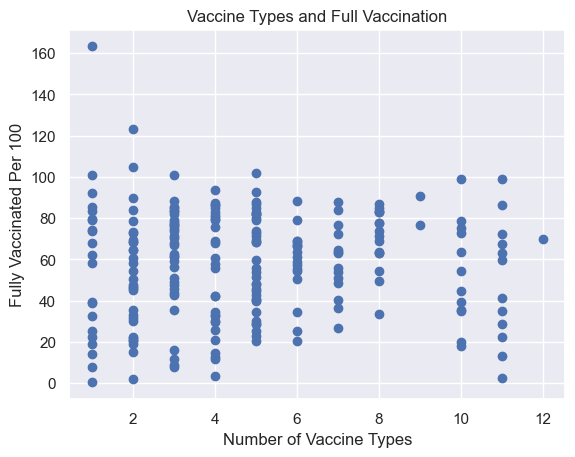

In [163]:
# I wanted to know what the numbers were of fully vaccinated persons per 100 for countries using a higher number of different vaccine types; this is a very simple way to begin some exploratory data analysis, and practice using matplotlib. The top left outlier is worth further investigation.

import matplotlib.pyplot as plt
# create a figure and axis
fig, ax = plt.subplots()

# scatter the vaccinations per 100 against the number of vaccine types used
ax.scatter(vacc_data['NUMBER_VACCINES_TYPES_USED'], vacc_data['PERSONS_FULLY_VACCINATED_PER100'])

# set a title and labels
ax.set_title('Vaccine Types and Full Vaccination')
ax.set_xlabel('Number of Vaccine Types')
ax.set_ylabel('Fully Vaccinated Per 100')

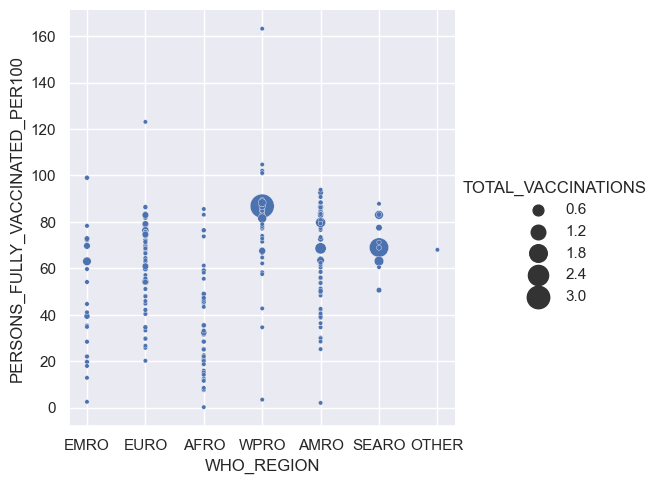

In [164]:
# I wanted to know what the fully vaccinated per 100 spread was like in the different WHO Regions. I also wanted to practice with seaborn, so I used the mark size to see total vaccinations against the y axis of full vaccinations per 100. The output is more sophisticated than matplotlib. There are some interesting outliers.

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Create a simple visualization
sns.relplot(
    data = vacc_data,
    x="WHO_REGION",
    y="PERSONS_FULLY_VACCINATED_PER100",
    size = "TOTAL_VACCINATIONS",
    sizes=(10, 300) # Set the size range for the circles based on total vaccinations
)

<AxesSubplot:xlabel='WHO_REGION', ylabel='TOTAL_VACCINATIONS_PER100'>

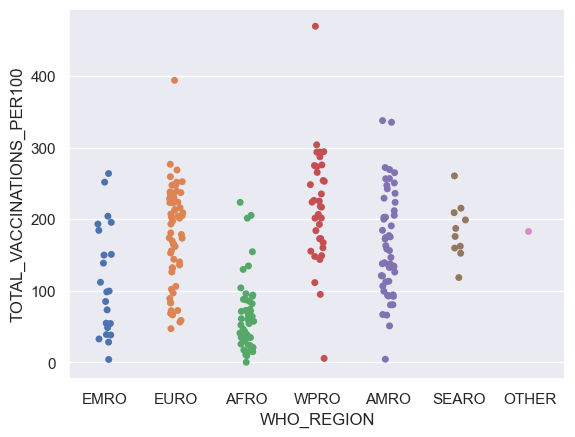

In [165]:
# The plot above is a good start on exploratory data analysis, but I wanted to drill down to see total vaccinations per 100, rather than fully vaccinated persons, and I wanted to see how the different WHO regions compared. A scatterplot using jitter = TRUE helps visualize the spread of the different countries' vaccination results.

# Seaborn scatterplot
import seaborn as sns
sns.set_theme()
sns.stripplot(
    data = vacc_data,
    x="WHO_REGION",
    y="TOTAL_VACCINATIONS_PER100",
    jitter=True
)

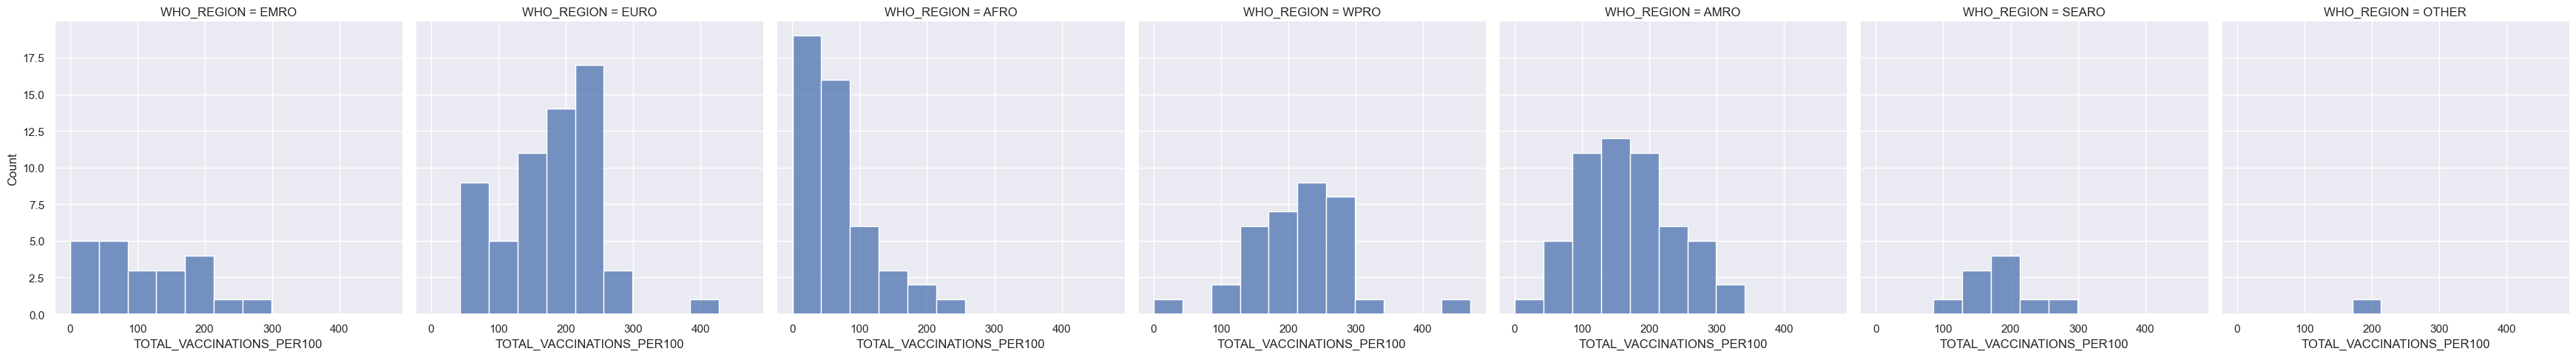

In [166]:
# The facet grid of distributions by WHO region is a more revealing way to compare the total vaccinations per 100 by the WHO regions.
sns.displot(
    data=vacc_data,
    x="TOTAL_VACCINATIONS_PER100",
    col="WHO_REGION")

<AxesSubplot:xlabel='TOTAL_VACCINATIONS_PER100', ylabel='WHO_REGION'>

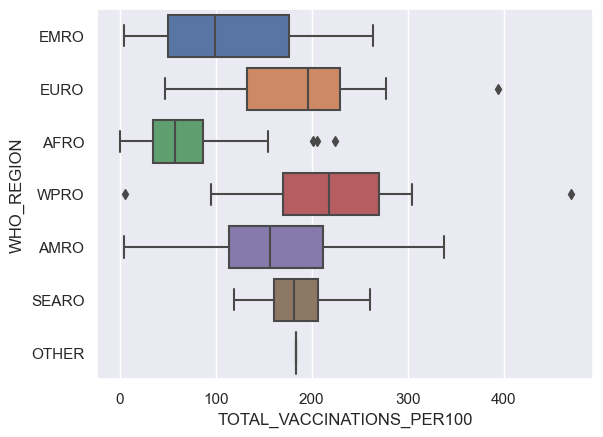

In [167]:
# There were some interesting outliers in the previous visualizations. I wanted to see what a boxplot might reveal about total vaccinations per 100 by the WHO regions. Seaborn defaults to "three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data." https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

sns.boxplot(
    data = vacc_data,
    x="TOTAL_VACCINATIONS_PER100",
    y="WHO_REGION",
    orient = "h"
)


<AxesSubplot:xlabel='TOTAL_VACCINATIONS_PER100', ylabel='Count'>

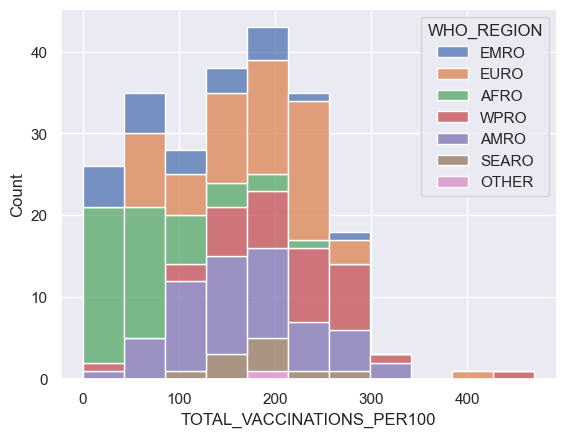

In [168]:
# The stacked histogram shows the share of each bin represented by the regions. Again, the vaccination results within the different regions are becoming clearer, and suggesting deeper investigation into the results for specific countries.
sns.histplot(
    data = vacc_data,
    x = "TOTAL_VACCINATIONS_PER100",
    hue = "WHO_REGION",
    multiple = "stack"
)

In [173]:
country_vacc_data = vacc_data[["WHO_REGION", "ISO3", "COUNTRY", "TOTAL_VACCINATIONS_PER100"]]
country_vacc_data.sort_values(by=["TOTAL_VACCINATIONS_PER100"], ascending=False)


,WHO_REGION,ISO3,COUNTRY,TOTAL_VACCINATIONS_PER100
207,WPRO,TKL,Tokelau,469.778
80,EURO,GIB,Gibraltar,394.200
42,AMRO,CHL,Chile,337.928
51,AMRO,CUB,Cuba,335.605
150,WPRO,NIU,Niue,304.079
...,...,...,...,...
159,WPRO,PNG,Papua New Guinea,5.727
91,AMRO,HTI,Haiti,4.523
226,EMRO,YEM,Yemen,4.167
34,AFRO,BDI,Burundi,0.285


In [174]:

vacc_data.nsmallest(10, "TOTAL_VACCINATIONS")


,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
163,Pitcairn Islands,PCN,WPRO,REPORTING,2022-02-28,138.0,55,276.000,110.000,37,74.000,AstraZeneca - Vaxzevria,2021-05-17,1.0,23.0,46.000
187,Sint Eustatius,XBA,AMRO,REPORTING,2023-02-10,4318.0,1791,137.560,57.056,1686,53.711,NaN,NaN,NaN,767.0,24.435
137,Montserrat,MSR,AMRO,REPORTING,2023-02-10,4619.0,2104,92.398,42.088,1952,39.048,AstraZeneca - Vaxzevria,2021-02-08,1.0,563.0,11.262
150,Niue,NIU,WPRO,REPORTING,2022-10-18,4920.0,1636,304.079,101.112,1634,100.989,Pfizer BioNTech - Comirnaty,2021-06-08,1.0,1224.0,75.649
173,Saba,XCA,AMRO,REPORTING,2023-02-10,4961.0,1687,256.648,87.274,1667,86.239,NaN,NaN,NaN,1169.0,60.476
207,Tokelau,TKL,WPRO,REPORTING,2022-11-23,6342.0,2203,469.778,163.185,2203,163.185,Pfizer BioNTech - Comirnaty,2021-07-20,1.0,968.0,71.704
174,"Saint Helena, Ascension and Tristan da Cunha",SHN,AFRO,OWID,2021-05-05,7892.0,4361,129.995,71.833,3531,58.162,AstraZeneca - AZD1222,NaN,1.0,NaN,NaN
68,Falkland Islands (Malvinas),FLK,AMRO,REPORTING,2022-06-21,9390.0,3220,269.595,92.449,2976,85.444,AstraZeneca - AZD1222,NaN,1.0,2543.0,73.012
225,Wallis and Futuna,WLF,WPRO,REPORTING,2022-07-26,16782.0,6592,149.226,58.616,6989,62.147,Moderna - Spikevax,2021-03-19,1.0,3201.0,28.463
6,Anguilla,AIA,AMRO,REPORTING,2023-02-10,24489.0,10854,163.238,72.350,10380,69.191,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2021-02-05,2.0,3003.0,20.017


In [175]:
vacc_data.nlargest(10, "TOTAL_VACCINATIONS")

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
43,China,CHN,WPRO,REPORTING,2022-11-29,3.465114e+09,1307511577,235.516,88.869,1277356924,86.819,"Anhui ZL - Zifivax,Beijing CNBG - BBIBP-CorV,C...",2020-07-22,8.0,804850776.0,54.704
95,India,IND,SEARO,REPORTING,2023-01-31,2.205114e+09,1025742707,159.790,74.329,951862244,68.975,"Bharat - Covaxin,Biological E - Corbevax,Gamal...",2021-01-16,8.0,227509022.0,16.486
219,United States of America,USA,AMRO,REPORTING,2023-02-10,6.625145e+08,266306865,200.154,80.455,227136359,68.621,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2020-12-14,4.0,115413606.0,34.868
29,Brazil,BRA,AMRO,REPORTING,2023-02-10,5.022624e+08,186615476,236.293,87.794,169594017,79.787,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2021-01-17,5.0,109018786.0,51.289
96,Indonesia,IDN,SEARO,REPORTING,2023-01-17,4.443031e+08,203657535,162.437,74.457,172693321,63.137,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-01-13,7.0,67952274.0,24.843
104,Japan,JPN,WPRO,REPORTING,2023-01-06,3.719714e+08,104548672,294.103,82.663,103144685,81.552,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Nov...",2021-02-17,4.0,85278522.0,67.426
16,Bangladesh,BGD,SEARO,REPORTING,2023-02-14,3.549908e+08,151141568,215.552,91.774,136721925,83.018,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-01-27,8.0,67127345.0,40.760
156,Pakistan,PAK,EMRO,REPORTING,2023-01-31,3.335104e+08,162218112,150.983,73.438,139227429,63.030,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-03,11.0,49962657.0,22.619
224,Viet Nam,VNM,WPRO,REPORTING,2023-02-09,2.662111e+08,90457873,273.490,92.931,85928073,88.278,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0,57743764.0,59.323
132,Mexico,MEX,AMRO,REPORTING,2023-02-10,2.250631e+08,99071001,174.558,76.839,81849962,63.483,"AstraZeneca - Vaxzevria,CanSino - Convidecia,C...",2020-12-24,8.0,57026630.0,44.230
